In [1]:
import pandas as pd
import seaborn as sns
from sqlalchemy import engine
from pandasql import sqldf
import matplotlib.pyplot as plt
import numpy as np

#Funcion lambda que hace escribir funciones en SQL mucho mas facil
pysqldf = lambda q: sqldf(q, globals())

In [3]:
df = pd.read_csv("mission_launches.csv")

In [4]:
df

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [6]:
df.shape

(4324, 9)

In [8]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [9]:
df.describe()

,Unnamed: 0.1,Unnamed: 0
count,4324.000000,4324.000000
mean,2161.500000,2161.500000
std,1248.375611,1248.375611
min,0.000000,0.000000
25%,1080.750000,1080.750000
50%,2161.500000,2161.500000
75%,3242.250000,3242.250000
max,4323.000000,4323.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [12]:
df.drop(df.columns[:2], axis=1, inplace=True)

In [13]:
df.isna().sum()

Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [14]:
df['Price'].head()

0     50.0
1    29.75
2      NaN
3     65.0
4    145.0
Name: Price, dtype: object

In [15]:
df['Price'] = df['Price'].str.replace(',','').astype(float)

In [17]:
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [18]:
df['Price'] = round(df['Price'], 2)

In [19]:
df['Date'] = pd.to_datetime(df['Date'], utc=True, errors='coerce')

In [20]:
df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,153.79,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [21]:
# ¿Qué organización lanzó más misiones espaciales en un año determinado?
df['Year'] = df['Date'].dt.year
df['Year'] = df['Year'].astype('Int64')

In [22]:

df.isna().sum()

Organisation        0
Location            0
Date              126
Detail              0
Rocket_Status       0
Price               0
Mission_Status      0
Year              126
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
def MostLaunchesPerYear(year):
    f_Data = df[df['Year'] == year]
    df_Missions = f_Data.groupby(['Year','Organisation']).size().reset_index(name='Mission_Count')
    Max_Missions = df_Missions['Mission_Count'].max()
    Organisation = df_Missions['Organisation'][df_Missions['Mission_Count'] == Max_Missions].values[0]

    return f"La organización que lanzó más misiones en {year} fue {Organisation} con {Max_Missions} misiones."

In [25]:
print(MostLaunchesPerYear(2020))

La organización que lanzó más misiones en 2020 fue CASC con 19 misiones.


In [26]:
# ¿Cuántos lanzamientos se realizaron por año? 
launches_per_year = df.groupby('Year').size().reset_index(name='N_Launches')
launches_per_year['Year'] = launches_per_year['Year'].astype('Int64')
launches_per_year

,Year,N_Launches
0,1957,3
1,1958,22
2,1959,20
3,1960,38
4,1961,52
...,...,...
59,2016,88
60,2017,90
61,2018,117
62,2019,107


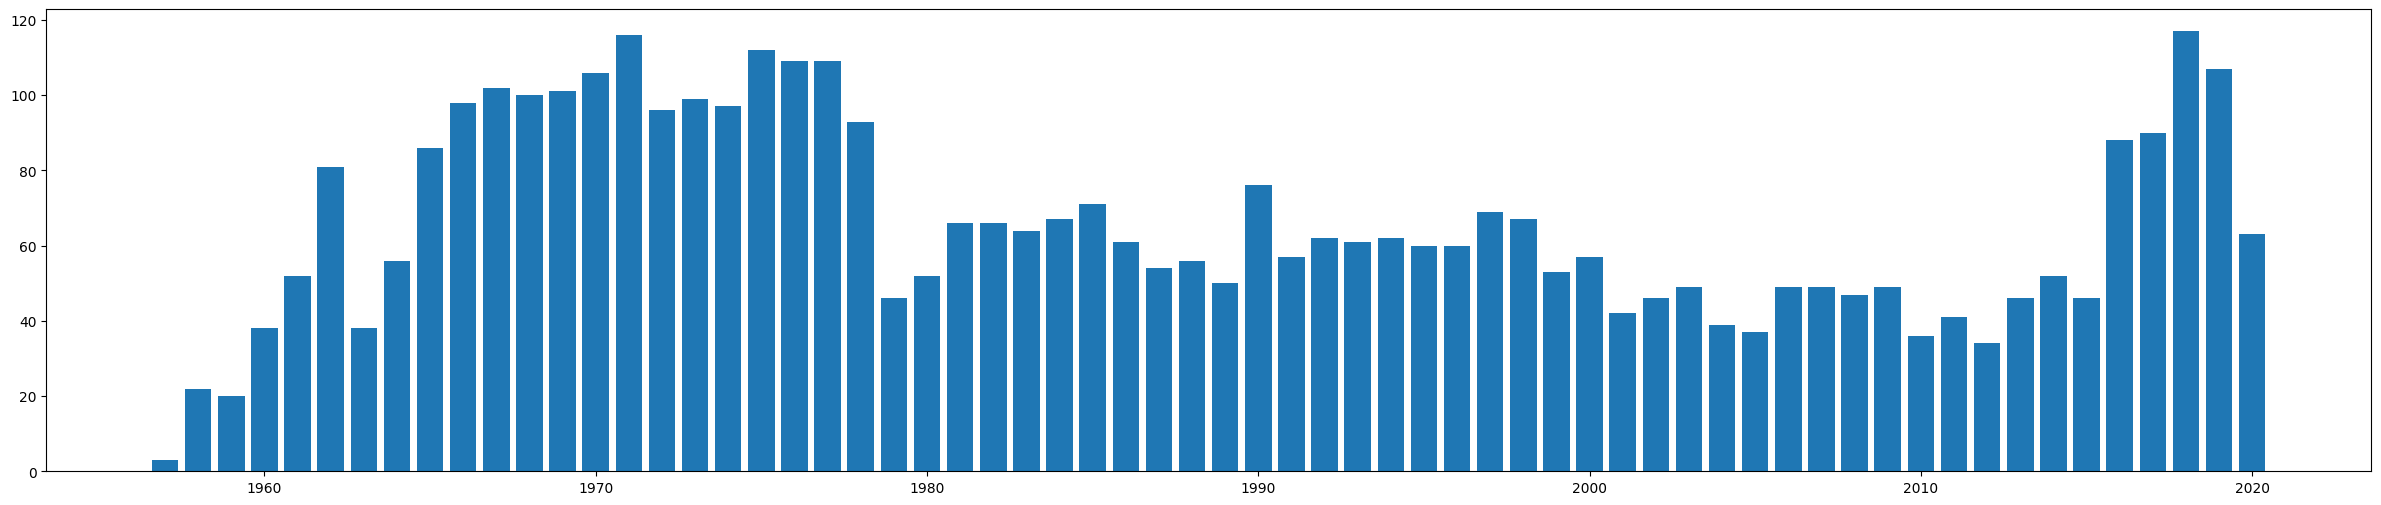

In [27]:
plt.figure(figsize=(30, 6))
plt.bar(launches_per_year['Year'], launches_per_year['N_Launches'])
plt.show()

In [28]:
# ¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?
mean_price = df.groupby('Year').agg({'Price': ['mean']})

mean_price.columns = ['Mean_Price']

mean_price['Mean_Price'] = round(mean_price['Mean_Price'],2)
mean_price

,Mean_Price
Year,
1957,153.79
1958,153.79
1959,153.79
1960,153.79
1961,153.79
...,...
2016,99.73
2017,91.97
2018,86.82


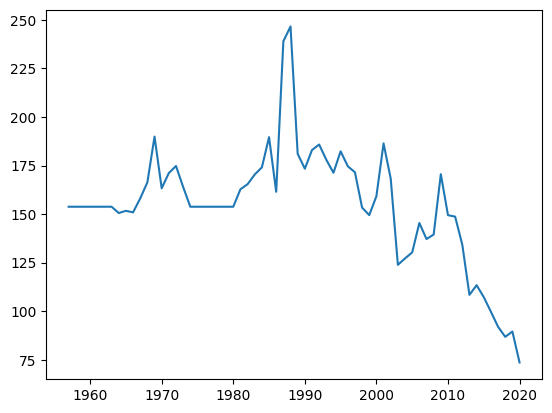

In [29]:
plt.plot(mean_price.index, mean_price.values)
plt.show()

In [30]:
# ¿Qué meses son los más populares para los lanzamientos? 
df['Month'] = df['Date'].dt.month_name()

In [31]:
top_months = df.groupby('Month').size().sort_values(ascending=False).head(3)

In [32]:
top_months

Month
December    430
June        386
October     375
dtype: int64

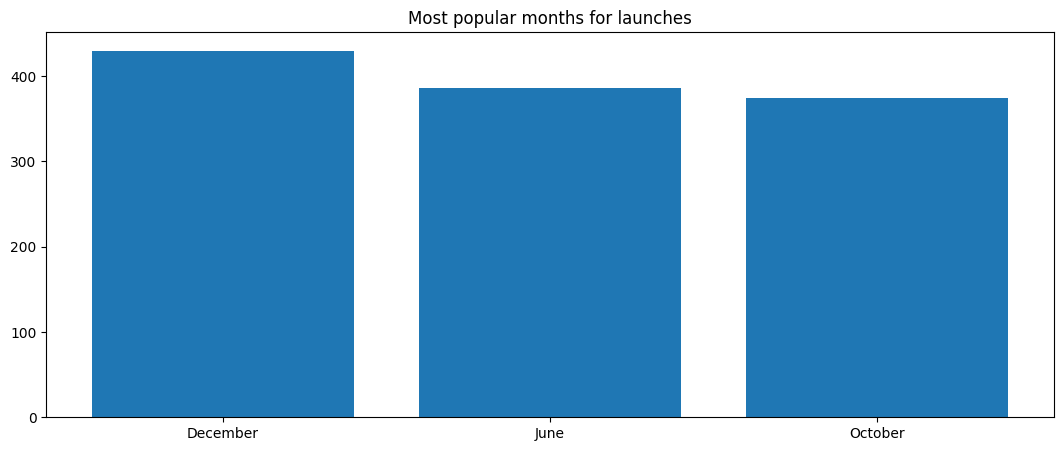

In [33]:
fig, ax = plt.subplots(figsize=(13,5))
plt.bar(top_months.index, top_months.values)
plt.title('Most popular months for launches')
plt.show()

In [50]:
# ¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?


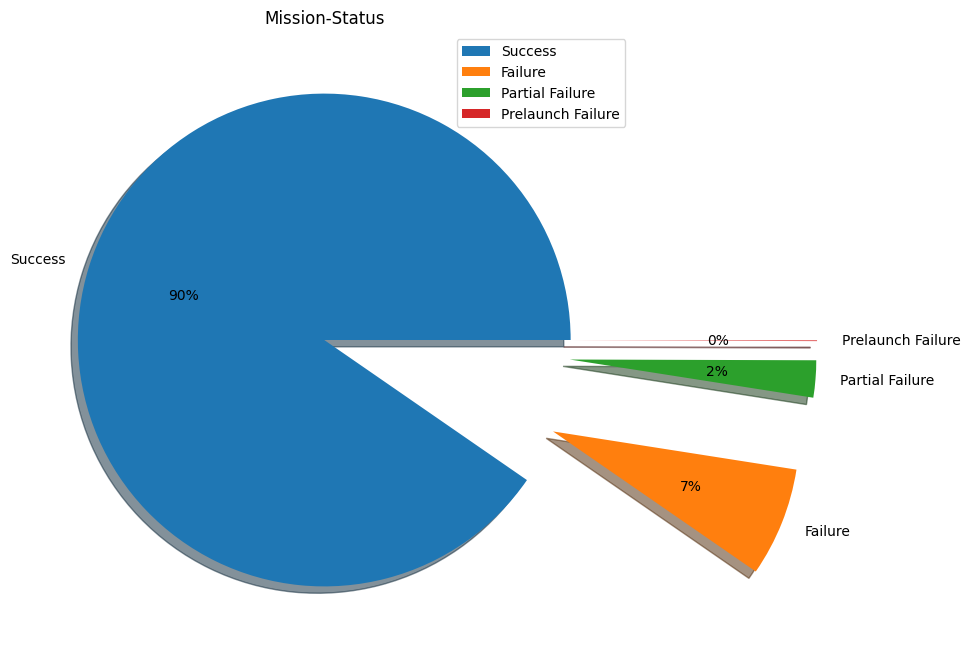

In [49]:
plt.figure(figsize = (8,8))

plt.pie(df['Mission_Status'].value_counts(),autopct='%i%%',labels=df['Mission_Status'].value_counts().index, explode=[0,1,1,1],shadow=True)
plt.title('Mission-Status')
plt.legend()

plt.show()

In [45]:
# Creamos la tabla pivot para el Mission_Status
data_ms = df.pivot_table(index='Year', columns='Mission_Status', aggfunc='size', fill_value=0)
data_ms

Mission_Status,Failure,Partial Failure,Prelaunch Failure,Success
Year,,,,
1957,1,0,0,2
1958,14,2,0,6
1959,9,3,0,8
1960,19,0,0,19
1961,17,3,0,32
...,...,...,...,...
2016,2,1,1,84
2017,5,2,0,83
2018,2,2,0,113


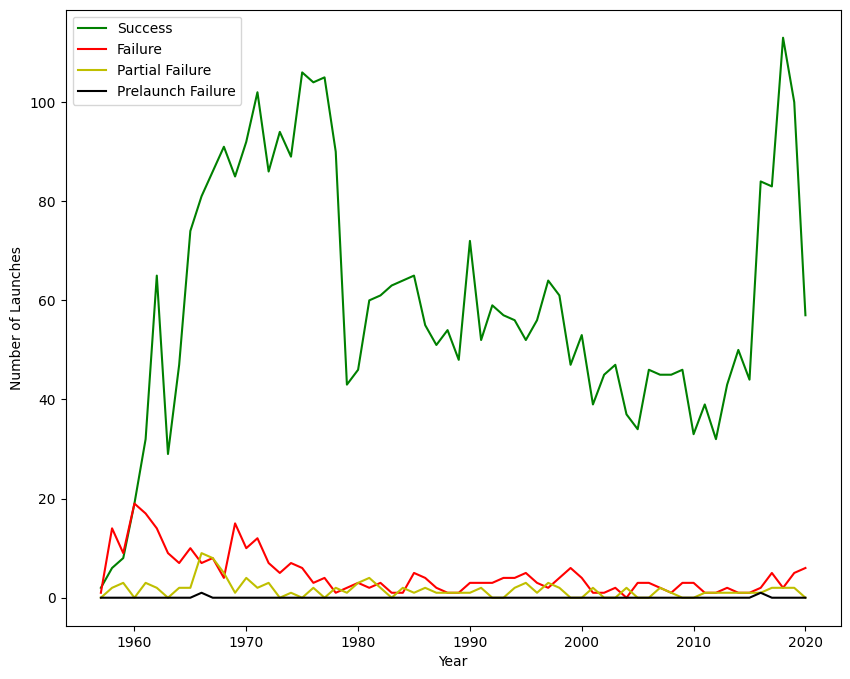

In [46]:
# Graficamos el numero de lanzamientos completos, fallidos, fallidos parcialmente y no lanzados
plt.figure(figsize = (10,8))
plt.plot(data_ms["Success"].index,
         data_ms["Success"],
         color='g', label='Success')
plt.plot(data_ms["Failure"].index,
         data_ms["Failure"],
         color='r',
         label='Failure')
plt.plot(data_ms["Partial Failure"].index,
         data_ms["Partial Failure"],
         color='y', 
         label='Partial Failure',)
plt.plot(data_ms["Prelaunch Failure"].index, 
         data_ms["Prelaunch Failure"], 
         color='black', 
         label='Prelaunch Failure')
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.legend()